## Machine learning for Health and Bioinformatics Assignment
Changhyun Kim (ID: 21134342)

### Data Cleaning

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Read data
data = pd.read_csv('PatientTimeSeries.csv')
data.head(50)

,Patient_id,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
0,p116812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,1,0
1,p116812,102.0,100.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,2,0
2,p116812,102.0,100.0,NaN,99.0,84.0,76.00,18.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,3,0
3,p116812,124.0,100.0,NaN,97.0,70.0,55.00,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,4,0
4,p116812,98.0,100.0,NaN,95.0,73.0,62.00,18.0,NaN,NaN,...,7.5,NaN,6.8,NaN,276.0,59.0,1,-6.01,5,0
5,p116812,101.0,100.0,NaN,120.0,85.0,68.00,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,6,0
6,p116812,101.0,100.0,36.60,120.0,85.0,68.00,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,7,0
7,p116812,102.0,96.0,NaN,103.0,73.0,58.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,8,0
8,p116812,91.0,100.0,NaN,89.0,66.0,54.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,9,0
9,p116812,102.0,99.0,NaN,103.0,78.0,62.00,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.0,1,-6.01,10,0


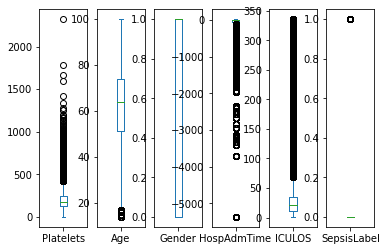

In [3]:
data.iloc[:,34:40].plot(kind='box', subplots=True, sharex=False, sharey=False)
plt.show()

All outliers are going to be replaced with the average value of corresponding features.

In [4]:
cols = data.columns
cols = cols[1:39]
cols
summary_stat = data.describe()
# q1 = summary_stat.loc['25%', 'HR']
# q3 = summary_stat.loc['75%', 'HR']
# iqr = q3 - q1
# upper_bound = q3 + 1.5 * iqr
# lower_bound = q1 - 1.5 * iqr
# print(upper_bound)
# data.loc[(data['HR'] > upper_bound) | (data['HR'] < lower_bound), 'HR']
bound = {}
for col in cols:
    q1 = summary_stat.loc['25%', col]
    q3 = summary_stat.loc['75%', col]
    avg = summary_stat.loc['mean', col]
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    bound[col] = (lower_bound, upper_bound)
    data[col] = data[col].apply(lambda x : avg if x >= upper_bound or x <= lower_bound else x)    
data

,Patient_id,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
0,p116812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.00,1,-6.01,1.0,0
1,p116812,102.0,100.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.00,1,-6.01,2.0,0
2,p116812,102.0,100.0,NaN,99.0,84.0,76.0,18.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.00,1,-6.01,3.0,0
3,p116812,124.0,100.0,NaN,97.0,70.0,55.0,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,59.00,1,-6.01,4.0,0
4,p116812,98.0,100.0,NaN,95.0,73.0,62.0,18.0,NaN,NaN,...,7.5,NaN,6.8,NaN,276.0,59.00,1,-6.01,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,p016300,89.0,100.0,36.44,97.0,67.0,54.0,24.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68.62,1,-115.55,6.0,0
1048571,p016300,92.0,100.0,NaN,130.0,86.0,62.0,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68.62,1,-115.55,7.0,0
1048572,p016300,94.0,100.0,NaN,105.0,74.0,59.0,17.0,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,68.62,1,-115.55,8.0,0
1048573,p016300,95.0,100.0,36.89,89.0,65.0,53.0,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,68.62,1,-115.55,9.0,0


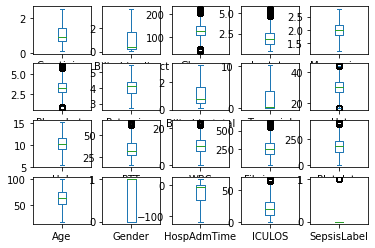

In [5]:
data.iloc[:,20:40].plot(kind='box', layout=(4,5),subplots=True, sharex=False, sharey=False)
plt.show()

The box plots show that many outliers are replaced with the average values comparing to the previous box plots. The black dots in the second box plots are not actually outliers but they are the data points which are really close to the each whisker. To be able to compare easily, there are summary statistics of each feature and their upper and lower bounds to regulate outliers from the original data

In [6]:
pd.DataFrame.from_dict(bound)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS
0,36.75,90.75,35.0,60.5,39.5,27.0,5.25,13.0,-9.0,15.925,...,16.35,5.35,5.4125,-1.7,-74.5,-48.5,17.475,-1.5,-117.115,-23.5
1,130.75,104.75,39.0,184.5,123.5,99.0,31.25,53.0,7.0,32.125,...,44.75,15.35,65.1125,23.1,617.5,419.5,107.915,2.5,70.205,68.5


In [7]:
data.describe()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,HospAdmTime,ICULOS,SepsisLabel
count,945030.000000,911165.000000,351898.000000,896310.000000,918122.000000,721427.000000,887150.000000,38404.000000,57094.000000,43994.000000,...,77254.000000,30944.000000,67082.000000,6789.000000,61992.000000,1.048575e+06,1.048575e+06,1.048567e+06,1.048575e+06,1.048575e+06
mean,84.073626,97.400732,36.981815,122.994406,81.618020,63.100957,18.449126,32.894158,-0.744810,24.024672,...,10.364040,34.641248,10.697031,271.044571,185.778499,6.199038e+01,5.604330e-01,-2.190869e+01,2.231903e+01,1.805307e-02
std,16.394830,2.274880,0.688462,21.790252,14.606443,12.435326,4.417874,6.958933,2.870535,3.316246,...,1.828097,9.173967,4.246537,116.122195,79.442991,1.637454e+01,4.963347e-01,2.835559e+01,1.401878e+01,1.331434e-01
min,37.000000,91.000000,35.030000,61.000000,39.670000,27.500000,5.500000,13.500000,-8.900000,16.000000,...,5.400000,16.600000,0.100000,34.000000,1.000000,1.800000e+01,0.000000e+00,-1.171100e+02,1.000000e+00,0.000000e+00
25%,72.000000,96.000000,36.500000,107.000000,71.000000,54.000000,15.500000,29.000000,-2.000000,22.000000,...,9.100000,27.800000,7.600000,185.000000,127.000000,5.149000e+01,0.000000e+00,-4.687000e+01,1.100000e+01,0.000000e+00
50%,83.500000,98.000000,37.000000,121.000000,80.000000,62.000000,18.000000,33.000000,-0.684051,24.000000,...,10.300000,32.400000,10.300000,254.000000,181.000000,6.400000e+01,1.000000e+00,-6.030000e+00,2.100000e+01,0.000000e+00
75%,95.000000,99.500000,37.440000,138.000000,91.000000,71.000000,21.000000,37.500000,1.000000,26.000000,...,11.600000,41.245061,13.200000,332.000000,234.000000,7.400000e+01,1.000000e+00,-4.000000e-02,3.200000e+01,0.000000e+00
max,130.500000,100.000000,38.970000,184.330000,123.330000,98.500000,31.000000,52.500000,6.800000,32.000000,...,15.300000,65.100000,23.050000,617.000000,419.000000,1.000000e+02,1.000000e+00,2.204000e+01,6.800000e+01,1.000000e+00


### Data Processing

In [51]:
m_data = data.iloc[:, :35]
m_data.groupby('Patient_id')

,Patient_id,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,...,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets
0,p116812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,p116812,102.0,100.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,...,NaN,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN
2,p116812,102.0,100.0,NaN,99.0,84.0,76.0,18.5,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,p116812,124.0,100.0,NaN,97.0,70.0,55.0,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,p116812,98.0,100.0,NaN,95.0,73.0,62.0,18.0,NaN,NaN,...,3.1,4.1,0.3,NaN,23.1,7.5,NaN,6.8,NaN,276.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,p016300,89.0,100.0,36.44,97.0,67.0,54.0,24.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,p016300,92.0,100.0,NaN,130.0,86.0,62.0,21.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,p016300,94.0,100.0,NaN,105.0,74.0,59.0,17.0,NaN,-1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,p016300,95.0,100.0,36.89,89.0,65.0,53.0,20.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
